# Youtube Data Analysis

<img src = "https://havecamerawilltravel.com/photographer/files/2020/01/youtube-logo-new.jpg" width="500" height="600"/>

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 50)

In [3]:
# Let's load the YouTube data

df = pd.read_csv("INVideos.csv",parse_dates = [1,5]) # to set DateTime Format


In [4]:

# Drop unnessary columns
df.drop(['tags', 'thumbnail_link', 'description'], axis = 1, inplace = True)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37351 entries, 0 to 37350
Data columns (total 13 columns):
video_id                  37351 non-null object
trending_date             37351 non-null object
title                     37351 non-null object
channel_title             37351 non-null object
category_id               37351 non-null int64
publish_time              37351 non-null datetime64[ns, UTC]
views                     37351 non-null int64
likes                     37351 non-null int64
dislikes                  37351 non-null int64
comment_count             37351 non-null int64
comments_disabled         37351 non-null bool
ratings_disabled          37351 non-null bool
video_error_or_removed    37351 non-null bool
dtypes: bool(3), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Convert date to pandas date-time format
df['trending_date']  = pd.to_datetime(df['trending_date'], format = '%y.%d.%m')
df['publish_time'] = df['publish_time'].dt.date
df['publish_time']= pd.to_datetime(df['publish_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37351 entries, 0 to 37350
Data columns (total 13 columns):
video_id                  37351 non-null object
trending_date             37351 non-null datetime64[ns]
title                     37351 non-null object
channel_title             37351 non-null object
category_id               37351 non-null int64
publish_time              37351 non-null datetime64[ns]
views                     37351 non-null int64
likes                     37351 non-null int64
dislikes                  37351 non-null int64
comment_count             37351 non-null int64
comments_disabled         37351 non-null bool
ratings_disabled          37351 non-null bool
video_error_or_removed    37351 non-null bool
dtypes: bool(3), datetime64[ns](2), int64(5), object(3)
memory usage: 3.0+ MB


In [7]:
# Rename the column
df = df.rename({"publish_time":"publish_date"}, axis = 1)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12,1096327,33966,798,882,False,False,False
1,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12,473988,2011,243,149,False,False,False
2,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12,1242680,70353,1624,2684,False,False,False
3,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13,464015,492,293,66,False,False,False
4,il_pSa5l98w,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10,6106669,98612,4185,4763,False,False,False


In [9]:

# Drop the duplicate rows
df=df.drop_duplicates(subset = ["video_id"], keep = "last")

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
11,Prb_osSVE0M,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2017-11-13,156085,716,53,0,True,False,False
21,1kuJkA9usqg,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,2017-11-13,387221,2159,1214,711,False,False,False
23,znOC3IU0dF8,2017-11-14,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13,55178,45,94,15,False,False,False
24,z3V9LUA6VQM,2017-11-14,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12,236710,858,197,66,False,False,False
30,gW4Su5wq0b8,2017-11-14,Neeya Naana - 12th November 2017 - Promo 2,Vijay Television,24,2017-11-11,261202,1971,126,201,False,False,False


## Task-1.1: Add a new column into the dataframe



In [11]:
df['Month']= df['publish_date'].dt.month

## Task-1.2: Month with most uploads

Find the month which is having maximum numbers of video uploads. 

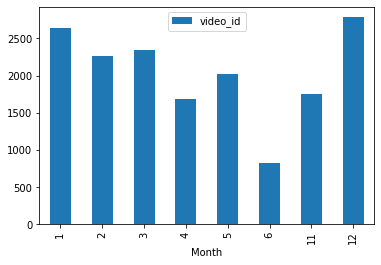

In [40]:
import matplotlib.pyplot as plt
df.groupby(['Month']).agg({'video_id':'count'}).plot(kind='bar')


## Task-1.3: Most viewed month

Find the month with maximum views. 

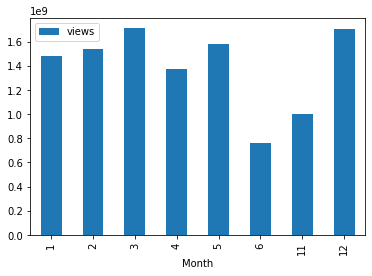

In [54]:
df.groupby('Month').agg({'views':'sum'}).plot(kind='bar')

## Task-1.4: No Reaction videos



In [47]:
len(df[(df.likes==0)&(df.ratings_disabled==False)])

0

## Task-1.5: Find the most viewed video uploaded by "T-Series" for the year 2017



In [51]:

df[(df.channel_title=='T-Series')&(df.publish_date.dt.year==2017)].sort_values('views',ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Month
9379,xWi8nDUjHGA,2018-01-02,Yo Yo Honey Singh: DIL CHORI (Video) Simar Kau...,T-Series,10,2017-12-26,34631260,645921,45039,58459,False,False,False,12
6911,dZ0fwJojhrs,2017-12-20,Guru Randhawa: Lahore (Official Video) Bhushan...,T-Series,10,2017-12-14,24248933,522839,23990,27454,False,False,False,12
730,c64I9HNpiOY,2017-11-17,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11,12936568,149414,10929,12397,False,False,False,11
7652,M2q64UowX9g,2017-12-24,Official Trailer: Sonu Ke Titu Ki Sweety | Luv...,T-Series,10,2017-12-20,9500472,167629,2185,5262,False,False,False,12
7997,P8ZWk3S14ec,2017-12-26,Yo Yo Honey Singh: Dil Chori (Song Teaser) | S...,T-Series,10,2017-12-24,3846957,86179,3704,10348,False,False,False,12
1295,VXOJPfk5k9o,2017-11-20,Official Trailer: Bulbul | Divya Khosla Kumar ...,T-Series,10,2017-11-17,2047593,24105,819,577,False,False,False,11
2005,gu_cSXf1zGo,2017-11-24,Official Trailer: Sallu Ki Shaadi | Movie Rele...,T-Series,10,2017-11-20,992449,8328,2045,722,False,False,False,11
3381,Lx4ESwFT9mk,2017-12-01,Ban Ja Rani Full Song (Video) | Tumhari Sulu |...,T-Series,10,2017-11-27,561983,5540,496,546,False,False,False,11
2265,rewrhR1sKx8,2017-11-25,Song Teaser: Ik Kahani | Gajendra Verma | Vikr...,T-Series,10,2017-11-20,468636,5028,384,458,False,False,False,11
4833,vIA73i3Juwk,2017-12-09,Bulbul: Short Film | Divya Khosla Kumar | Shiv...,T-Series,10,2017-12-07,241929,10648,855,690,False,False,False,12


# Covid-19 Analysis

<img src = "https://www.leaders-in-law.com/wp-content/uploads/2020/03/COVID-19.png" width="500" height="600"/>

In [55]:
covid = pd.read_csv("covid_19_india.csv")
covid['Date']  = pd.to_datetime(covid['Date'], format = '%d/%m/%y')
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


## Task-2.1: Corona Cases Growth Rate

In this question, you will analyze, what is the rate at which the confirmed cases together with cured and deaths are increasing?


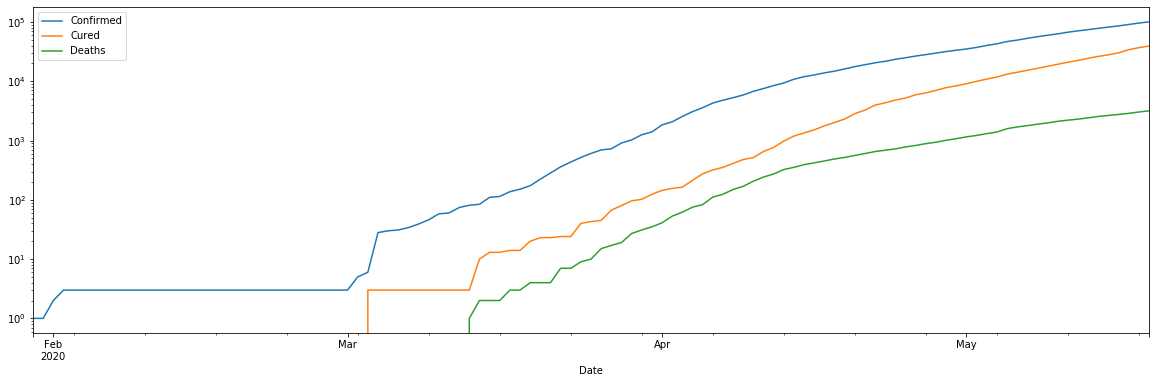

In [58]:
covid.groupby('Date').agg({'Confirmed':'sum','Cured':'sum','Deaths':'sum'}).plot(kind = 'line',figsize=(20,6), logy = True)

## Task-2.2: Mumbai Growth Rate VS National Growth Rate

In this question, we will compare the growth rate of Mumbai with the National growth rate.

### Task-2.2.1: Filter Maharashtra Data



In [59]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [98]:
maha = covid[covid['State/UnionTerritory']=='Maharashtra']
maha = maha[['Date','Confirmed', 'Cured', 'Deaths']]
maha

,Date,Confirmed,Cured,Deaths
76,2020-03-09,2,0,0
91,2020-03-10,5,0,0
97,2020-03-11,2,0,0
120,2020-03-12,11,0,0
133,2020-03-13,14,0,0
...,...,...,...,...
1954,2020-05-15,27524,6059,1019
1987,2020-05-16,29100,6564,1068
2020,2020-05-17,30706,7088,1135
2053,2020-05-18,33053,7688,1198


### Task-2.2.2: Filter data for Rest of India



In [174]:
roi = covid[covid['State/UnionTerritory']!='Maharashtra']
roi = roi[['Date', 'Cured','Deaths','Confirmed']]
roi = roi.groupby('Date').agg({'Confirmed':'sum','Cured':'sum','Deaths':'sum'})
roi.reset_index()


,Date,Confirmed,Cured,Deaths
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
...,...,...,...,...
106,2020-05-15,54446,21861,1630
107,2020-05-16,56610,23589,1684
108,2020-05-17,59931,27021,1737
109,2020-05-18,62706,29136,1831


### Task-2.2.3: Merge Mumbai and Rest of India data



In [119]:
maha_india = pd.merge(maha,roi,on='Date',suffixes=('_maha', '_India'))
#maha_india.reset_index('Date',inplace=True)
#maha_India.head(10)
#maha_india.plot(kind = 'line',figsize=(20,6),logy=True)
maha_india.set_index('Date',inplace=True)

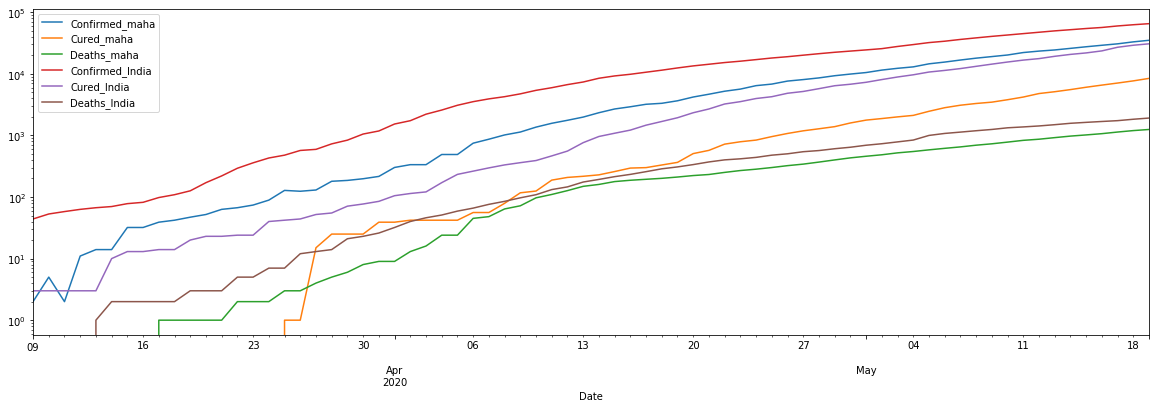

In [121]:
maha_india.plot(kind = 'line',figsize=(20,6),logy=True)

## Task-2.3: Number of Cases per Age Group

In this question, we will load a new data with patients details. Using this, we will try to understand what is the age distribution of the Corona Patients.

### Task-2.3.1: Load the data



In [170]:
df_D=pd.read_csv('IndividualDetails.csv')
df_D.tail()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
27881,27886,NaN,26-04-2020,nan,NaN,NaN,NaN,Delhi,NaN,Hospitalized,26-04-2020,Details awaited
27882,27887,NaN,26-04-2020,nan,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,26-04-2020,Details awaited
27883,27888,NaN,26-04-2020,12.00,F,NaN,Munger,Bihar,NaN,Hospitalized,26-04-2020,Details awaited
27884,27889,NaN,26-04-2020,13.00,F,NaN,Munger,Bihar,NaN,Hospitalized,26-04-2020,Details awaited
27885,27890,NaN,26-04-2020,17.00,F,NaN,Munger,Bihar,NaN,Hospitalized,26-04-2020,Details awaited


### Task-2.3.2: Gender wise count of patients

Check in the data, how many males and females were found corona positive



In [125]:
df_D.groupby('gender').agg({'id':'count'})

,id
gender,
F,1766
M,3543


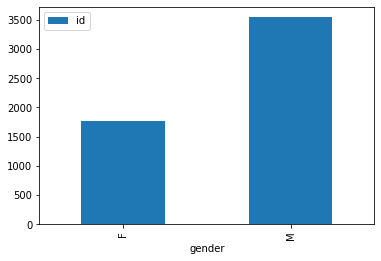

In [168]:
df_D.groupby('gender').agg({'id':'count'}).plot(kind='bar')

### Task-2.3.3: Derive age_group variable

Here we will divide the data into various `age_group`, so that we can analyze the distibution. Age group can be create by using integer division(//) on age variable, So if the age is 24 the age_group will be 2: 24//10=2



In [129]:
df_D['age_group']= df_D.age//10

df_D

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes,age_group
0,0,KL-TS-P1,30-01-2020,20.00,F,Thrissur,Thrissur,Kerala,India,Recovered,14-02-2020,Travelled from Wuhan,2.00
1,1,KL-AL-P1,02-02-2020,nan,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14-02-2020,Travelled from Wuhan,nan
2,2,KL-KS-P1,03-02-2020,nan,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14-02-2020,Travelled from Wuhan,nan
3,3,DL-P1,02-03-2020,45.00,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15-03-2020,"Travelled from Austria, Italy",4.00
4,4,TS-P1,02-03-2020,24.00,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02-03-2020,"Travelled from Dubai to Bangalore on 20th Feb,...",2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27881,27886,NaN,26-04-2020,nan,NaN,NaN,NaN,Delhi,NaN,Hospitalized,26-04-2020,Details awaited,nan
27882,27887,NaN,26-04-2020,nan,NaN,NaN,NaN,Uttarakhand,NaN,Hospitalized,26-04-2020,Details awaited,nan
27883,27888,NaN,26-04-2020,12.00,F,NaN,Munger,Bihar,NaN,Hospitalized,26-04-2020,Details awaited,1.00
27884,27889,NaN,26-04-2020,13.00,F,NaN,Munger,Bihar,NaN,Hospitalized,26-04-2020,Details awaited,1.00


### Task-2.3.4: Plot the distribution

Here you are required to plot the age_group and check the count of patients in each age group



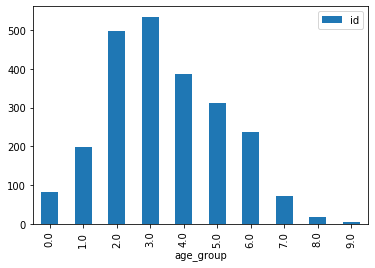

In [132]:
df_D.groupby('age_group').agg({'id':'count'}).plot(kind='bar')

# Analysis on IPL Data

<figure class="half" style="display:flex">
    <img style="width:400px" src="https://www.logotaglines.com/wp-content/uploads/2016/07/Ipl-logo.jpg">
    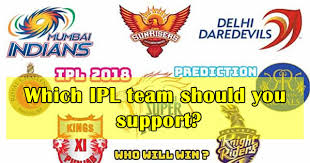
</figure>

## Task-3.1: Load IPL data



In [141]:
df_ipl = pd.read_csv('ipl_matches.csv',parse_dates=[3])
df_ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Task-3.2: Team with most WINS




In [143]:
df_ipl.groupby('winner').agg({'id':'count'}).sort_values('id',ascending=False)

,id
winner,
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


## Task-3.3: Top-3 teams winning with the maximum run margin



In [147]:
df_temp=df_ipl.sort_values('win_by_runs',ascending=False)


In [151]:
df_temp[['season','winner','win_by_runs']].head(3)

,season,winner,win_by_runs
43,2017,Mumbai Indians,146
619,2016,Royal Challengers Bangalore,144
59,2008,Kolkata Knight Riders,140


## Task-3.4: Top-3 teams winning with the maximum wickets




In [153]:
df_temp=df_ipl.sort_values('win_by_wickets',ascending=False)
df_temp[['season','winner','win_by_wickets']].head(3)

,season,winner,win_by_wickets
119,2009,Delhi Daredevils,10
390,2013,Chennai Super Kings,10
34,2017,Kings XI Punjab,10


## Task-3.5: Team wise best city

Here we will try to find out the best city team wise. Follow the steps to obtain the results



In [157]:
City=df_ipl.groupby(['winner','city']).agg({'id':'count'}).reset_index().sort_values('id',ascending=False)

In [158]:
City[City.winner=='Sunrisers Hyderabad']

,winner,city,id
201,Sunrisers Hyderabad,Hyderabad,30
200,Sunrisers Hyderabad,Delhi,6
199,Sunrisers Hyderabad,Chandigarh,4
210,Sunrisers Hyderabad,Visakhapatnam,3
204,Sunrisers Hyderabad,Kolkata,2
205,Sunrisers Hyderabad,Mumbai,2
198,Sunrisers Hyderabad,Bangalore,2
197,Sunrisers Hyderabad,Ahmedabad,1
202,Sunrisers Hyderabad,Jaipur,1
203,Sunrisers Hyderabad,Kanpur,1


In [1]:
df_ipl.groupby(['winner','city']).agg({'id':'count'}).reset_index().sort_values('id',ascending=False).head(10)

NameError: name 'df_ipl' is not defined

## Task-3.6: Team wise best toss

Here we will try to find out the best toss(bat or field) for all the teams. Follow the steps below



In [164]:
toss=df_ipl.groupby(['winner','toss_decision']).agg({'id':'count'}).reset_index().sort_values('id',ascending=False)
toss.drop_duplicates(subset=['winner'])# for Best Toss

,winner,toss_decision,id
16,Mumbai Indians,field,64
11,Kings XI Punjab,field,61
25,Royal Challengers Bangalore,field,58
14,Kolkata Knight Riders,field,57
0,Chennai Super Kings,bat,52
20,Rajasthan Royals,field,41
7,Delhi Daredevils,field,38
27,Sunrisers Hyderabad,field,37
3,Deccan Chargers,field,15
9,Gujarat Lions,field,11
